# Понижение размерности и отбор признаков
## 1.Линейная алгебра

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
from PIL import Image
from io import StringIO, BytesIO

mpl.rcParams['figure.figsize'] = (8,5)

In [138]:
def get_image(url):
    print("making request")
    r = requests.get(url)
    strio = BytesIO(r.content)
    i = Image.open(strio)
    print("got image with size %s"%str(np.array(i).shape))
    return i

making request
got image with size (320, 480, 3)
making request
got image with size (320, 480, 3)


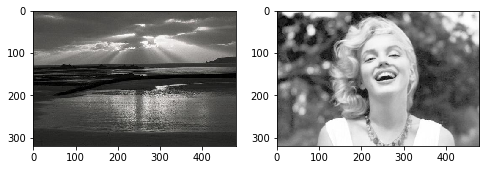

In [139]:
img_links=['http://lykov.tech/data/'+name for name in['bliss.jpg','monroe.jpg']]
imgs = [np.array(get_image(i)) for i in img_links]
plt.subplot(121) 
plt.imshow(imgs[0]) 
plt.subplot(122) 
plt.imshow(imgs[1])

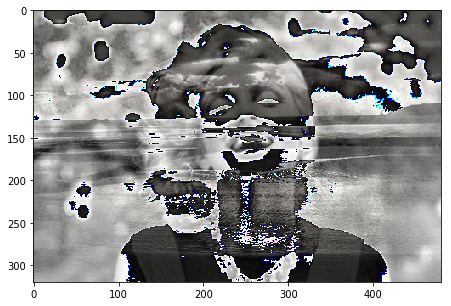

In [140]:

plt.imshow(imgs[0]+imgs[1])

In [141]:

print(type(imgs[1][0,0,0]))

<class 'numpy.uint8'>


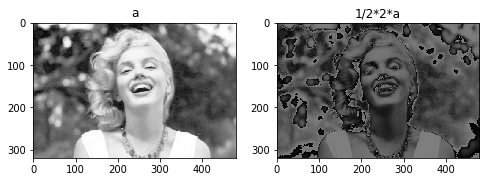

In [142]:
ax=plt.subplot(121)
ax.set_title('a')
ax.imshow(imgs[1]*(2//2))
ax2=plt.subplot(122)
ax2.set_title('1/2*2*a')
plt.imshow(imgs[1]*2//2)

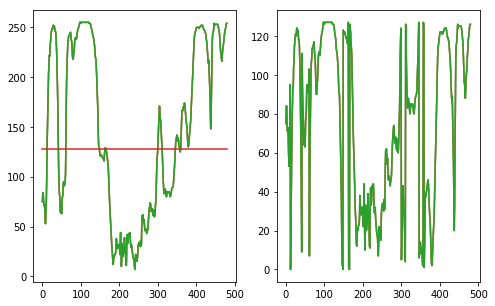

In [143]:
plt.subplot(121)
plt.plot(imgs[1][9]*(2//2))
plt.plot([128]*480)

plt.subplot(122)
plt.plot(imgs[1][9]*2//2)

## 2. PCA

dispersion ratio: 3.200000


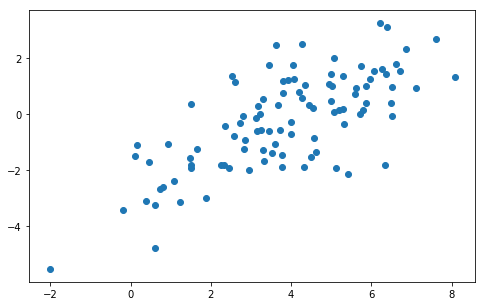

In [231]:
X=np.random.randn(2,100)
X[0]*=2.718
X[0]+=3.2
X[1]-=2.2
ph = np.random.random()*np.pi
c, s = np.cos(ph), np.sin(ph)
R = np.array(((c,-s), (s, c)))
X=np.dot(R,X)
print('dispersion ratio: %f'%(3.2))
plt.scatter(*X)

In [232]:
def PCA_2d(x):
    """
    :param x: a (2,N)-saped numpy array
    :return: a tuple of transformed array and a dict {singular value: vector}
    """
    # translate to center
    X=np.array([l-np.mean(l) for l in x])
    # compute svd
    U,s,V=np.linalg.svd(X)
    print('singular vals ratio: %f'%(max(s)/min(s)))
    lookup={s:vec for s,vec in zip(s,U)}
    E = [lookup[v] for v in sorted(s)]
    print('eigenvectors: %s'%str(E))
    E=np.array(E)
    X_=np.dot(E,X)
    return X_,lookup

singular vals ratio: 2.508153
eigenvectors: [array([-0.62300509,  0.78221778]), array([-0.78221778, -0.62300509])]


Text(0.5,1,'original')

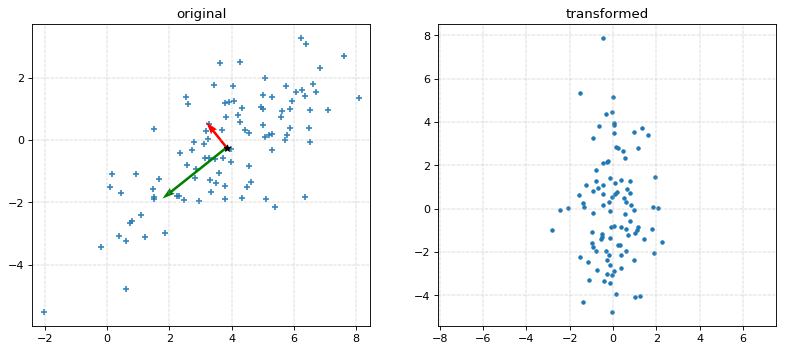

In [257]:
X_,sings=PCA_2d(X)

E = np.array([sings[v] for v in sorted(sings.keys())])
means = np.mean(X,axis=1)

plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
ax1=plt.subplot(122)
#ax1.bar([1,2],sings.keys())
ax1.scatter(*X_,marker='.')
ax1.set_title('transformed')
ax1.axis('equal')
ax1.grid(True,linewidth=0.4,linestyle='-.')
ax2=plt.subplot(121)
#ax2.scatter(*X_,marker='.')
ax2.scatter(*X,alpha=0.9,marker='+')

ax2.axis('equal')
ax2.grid(True,linewidth=0.4,linestyle='-.')
ax2.quiver(*means,*(E.T*list(sorted(sings.keys()))),scale=100,color=['r','g'])
ax2.scatter(*means,marker='*',color='black')
ax2.set_title('original')

In [256]:

X_cent=X-means.reshape((-1,1))
W = np.dot(X_cent,X_cent.T)
vecs = np.dot(W,E.T)
print( 'before\n%s\nafter:\n%s'%(E,vecs))
print( 'ratios \n%s'%(np.divide(vecs,E)))
print( 'sqrt ratios \n%s'%(np.sqrt(np.abs(np.divide(vecs,E)))))

before
[[-0.62300509  0.78221778]
 [-0.78221778 -0.62300509]]
after:
[[ -58.18806012 -459.59775234]
 [  73.05836818 -366.05117674]]
ratios 
[[  93.39901231 -587.55728056]
 [ -93.39901231  587.55728056]]
sqrt ratios 
[[ 9.66431644 24.23958087]
 [ 9.66431644 24.23958087]]
